In [26]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import pickle as pk

dir = "/data/home/hamiddashti/hamid/nasa_above/greeness/"
out_dir = "/data/home/hamiddashti/hamid/nasa_above/greeness/working/Figures/"

Map different components of greening/browning trends

In [13]:
lai_growing_trend_total = xr.open_dataarray(
    dir + "data/processed_data/noaa_nc/lai_fapar/trend/lai_growing_trend_total.nc"
)
lai_growing_trend_nv = xr.open_dataarray(
    dir + "data/processed_data/noaa_nc/lai_fapar/trend/lai_growing_trend_nv.nc"
)
lai_growing_trend_lcc = xr.open_dataarray(
    dir + "data/processed_data/noaa_nc/lai_fapar/trend/lai_growing_trend_lcc.nc"
)
border = gpd.read_file(dir + "data/shp_files/CoreDomain_geographic.shp")
canada = gpd.read_file(dir + "data/shp_files/Canada_US.shp")
changed = xr.open_dataarray(
    dir + "data/processed_data/noaa_nc/lai_fapar/trend/changed_pixels.nc"
)
percent_cover = xr.open_dataarray(
    dir + "data/processed_data/percent_cover/percent_cover.nc"
)
percent_cover["lat"] = changed["lat"]
percent_cover["lon"] = changed["lon"]
df_growing = xr.open_dataarray(
    dir + "data/processed_data/noaa_nc/lai_fapar/Rbeast/df_growingSepDist5.nc"
)
percent_mat_data = xr.open_dataarray(
    dir
    + "data/processed_data/noaa_nc/lai_fapar/Rbeast/percent_mat_data_df_growingSepDist5.nc"
)
LCs = ["EF", "DF", "Shrub", "Herb", "Sparse", "Barren"]

Rbeast Analyses

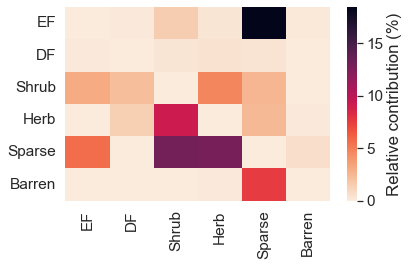

In [38]:
sns.set(font_scale=1.4)
fig = plt.figure(figsize=(6,4))
df_growing = df_growing[0:6,0:6]
df_growing_relative = df_growing/df_growing.sum()
sns.heatmap(df_growing_relative*100,robust=True,xticklabels=LCs,yticklabels=LCs,cmap="rocket_r",cbar_kws={"label":"Relative contribution (%)"})

plt.tight_layout()
plt.savefig(dir+"manuscript1/figures/lc_heatmap.png")

Plot trend in pixels where its only a pdf and has not changed for the past three decades

In [3]:
percent_cover_not_changed = percent_cover.where(changed == False) * 100


In [25]:
trend_dom_lcc = []
for k in range(6):

    lcc_dominant = percent_cover_not_changed.where(
        (percent_cover_not_changed.isel(band=k) >= 92).all(dim=["time"])
    ).isel(time=0, band=k)
    a = lai_growing_trend_total.where(np.isfinite(lcc_dominant)).values
    trend_dom_lcc.append(a[~np.isnan(a)])


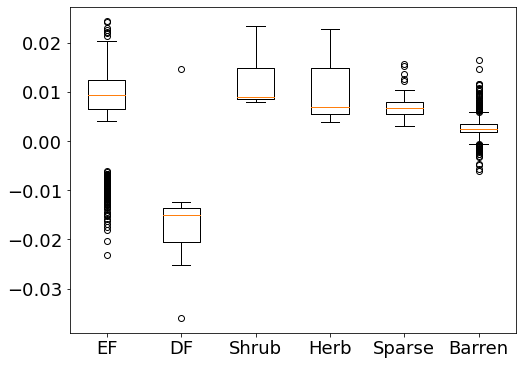

In [76]:

fig = plt.figure(figsize=(8, 6), linewidth=3)
ax = plt.subplot(111)
for i in range(6):
    # print(len(trend_dom_lcc[i]))
    ax.boxplot(
        trend_dom_lcc[i],
        positions=[i],
        widths=0.5,
        # patch_artist=True,
        boxprops=dict(color="k"),
    )

ax.set_xticklabels(LCs, fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=18)

plt.savefig(dir + "manuscript1/figures/dominant_lc_trends.png")


Map different components of the trend (total trend = trend_nv + $\epsilon_{LCC}$).

/tmp/ipykernel_3266/1089503047.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0, hspace=0.09)


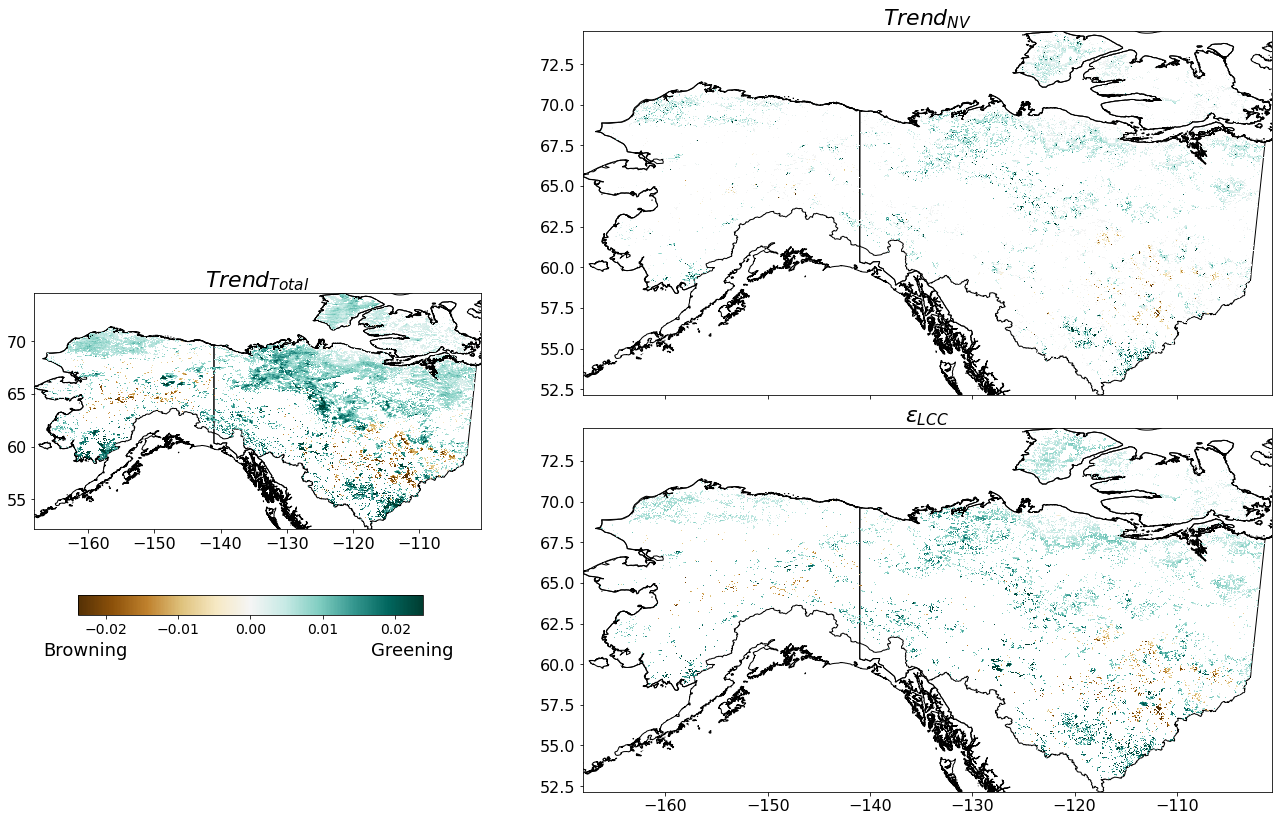

In [57]:
# cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(24, 14), constrained_layout=True)
gs = fig.add_gridspec(2, 3)
# gs.update(wspace=0.005, hspace=0.005)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:3])
ax3 = fig.add_subplot(gs[1, 1:3], sharex=ax2)
plt.setp(ax2.get_xticklabels(), visible=False)

im = border.plot(ax=ax1, facecolor="none")
im = canada.plot(ax=ax1, facecolor="none")
im = lai_growing_trend_total.plot(
    ax=ax1,
    robust=True,
    cmap="BrBG",
    add_colorbar=False,
)
im = border.plot(ax=ax2, facecolor="none")
im = canada.plot(ax=ax2, facecolor="none")
im = lai_growing_trend_nv.plot(ax=ax2, robust=True, cmap="BrBG", add_colorbar=False)
im = border.plot(ax=ax3, facecolor="none")
im = canada.plot(ax=ax3, facecolor="none")
im = lai_growing_trend_lcc.plot(ax=ax3, robust=True, cmap="BrBG", add_colorbar=False)

# ax1.title.set_text("$Trend_{NV}$",fontsize=12)
ax1.set_title("$Trend_{Total}$", fontsize=22)
ax1.tick_params(axis="both", which="major", labelsize=16)

ax2.set_title("$Trend_{NV}$", fontsize=22)
ax2.tick_params(axis="both", which="major", labelsize=16)
ax3.set_title("$\epsilon_{LCC}$", fontsize=22)
ax3.tick_params(axis="both", which="major", labelsize=16)

plt.setp(plt.gcf().get_axes(), xlabel="", ylabel="")
plt.subplots_adjust(wspace=0, hspace=0.09)
cbar_ax = fig.add_axes([0.15, 0.3, 0.2, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cbar.ax.tick_params(labelsize=14)
plt.text(0.13, 0.26, "Browning", fontsize=18, transform=plt.gcf().transFigure)
plt.text(0.32, 0.26, "Greening", fontsize=18, transform=plt.gcf().transFigure)
plt.savefig(
    dir + "manuscript1/figures/trend_components.png",
    bbox_inches="tight",
    pad_inches=0.01,
    transparent=True,
)


Working on extremes

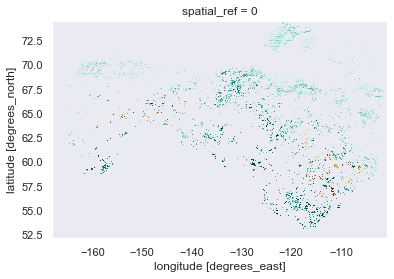

In [25]:
sns.set(font_scale=1)
im = lai_growing_trend_lcc.plot(robust=True, cmap="BrBG", add_colorbar=False)

In [35]:
file_pi2 = open(dir + "data/processed_data/noaa_nc/lai_fapar/Rbeast/out_growingSepDist5", 'rb') 
out_growing = pk.load(file_pi2)

In [34]:
slp = out_growing.trend.slp

Object of 12 field(s):

 time              : [30 float32] 
 data              : [30x448x1348 float32] 
 marg_lik          : [448x1348 float32] 
 R2                : [448x1348 float32] 
 RMSE              : [448x1348 float32] 
 sig2              : [448x1348 float32] 
 trend             : [ 1 object with 17 fields] 
                     ncp            : [448x1348 float32] 
                     ncp_median     : [448x1348 float32] 
                     ncp_mode       : [448x1348 float32] 
                     ncp_pct90      : [448x1348 float32] 
                     ncp_pct10      : [448x1348 float32] 
                     ncpPr          : [3x448x1348 float32] 
                     cpOccPr        : [30x448x1348 float32] 
                     cp             : [2x448x1348 float32] 
                     cpPr           : [2x448x1348 float32] 
                     cpAbruptChange : [2x448x1348 float32] 
                     cpCI           : [2x2x448x1348 float32] 
                     Y         